#### G-Числа
Витя хочет придумать новую игру с числами. В этой игре от игроков требуется преобразовывать четырехзначные числа не содержащие нулей при помощи следующего разрешенного набора действий:

Можно увеличить первую цифру числа на 1, если она не равна 9.
Можно уменьшить последнюю цифру на 1, если она не равна 1.
Можно циклически сдвинуть все цифры на одну вправо.
Можно циклически сдвинуть все цифры на одну влево.
Например, применяя эти правила к числу 1234 можно получить числа 2234, 1233, 4123 и 2341 соответственно. Точные правила игры Витя пока не придумал, но пока его интересует вопрос, как получить из одного числа другое за минимальное количество операций.

Формат входных данных
Во входном файле содержится два различных четырехзначных числа, каждое из которых не содержит нулей.

Формат выходных данных
Программа должна вывести последовательность четырехзначных чисел, не содержащих нулей. Последовательность должна начинаться первым из данных чисел и заканчиваться вторым из данных чисел, каждое последующее число в последовательности должно быть получено из предыдущего числа применением одного из правил. Количество чисел в последовательности должно быть минимально возможным.

In [1]:
from collections import deque

def get_neighbours(number):
    nb_numbers=set()
    first_digit=number//1000
    last_digit=number%10
    if first_digit!=9:
        nb_numbers.add(1000+number)
    if last_digit!=1:
        nb_numbers.add(number-1)
    nb_numbers.add(number%1000*10+first_digit)
    nb_numbers.add(last_digit*1000+number//10)
    nb_numbers.discard(number)
    return nb_numbers

def bfs_find_parents(start,end):
    queue=deque([start])
    #used={start}
    parents={start:None}
    #print(queue,used)
    while queue:
        v=queue.popleft()
        for nb in get_neighbours(v):
            if nb not in parents:
                parents[nb]=v
                if nb==end:
                    return parents
                queue.append(nb)

def find_min_path(end,parents):
    path=[end]
    parent=parents[end]
    while parent is not None:
        path.append(parent)
        parent=parents[parent]
    return path[::-1]

def get_path(start,end):
    if '0' in str(start) or '0' in str(end) or start==end:
        return False
    ldigit=[start//1000,end//1000]
    for ld in ldigit:
        if ld<1 or ld>9:
            return False
    parents=bfs_find_parents(start,end)
    path=find_min_path(end,parents)
    return path

start=int(input())
end=int(input())
path=get_path(start,end)
if path:
    for number in path:
        print(number)
    #print(*path,sep='\n')

1234
4321
1234
1233
1232
2321
3321
4321


In [ ]:
import time
import random
from tqdm import tqdm

def get_rand_number():
    number=0
    for i in range(4):
        number+=random.randrange(1,10)*10**i
    return number
        
def test_rand_numbers(posfail):
    tries=10000
    sum_time=0
    max_path_len=0
    for i in tqdm(range(tries)):
        start=get_rand_number()
        end=get_rand_number()
        st=time.time()
        path=get_path(start,end)
        et=time.time()
        sum_time+=et-st
        rev_path=get_path(end,start)
        if not path and not rev_path:
            continue
        if not path or not rev_path:
            posfail.append((start,end))
            continue
        max_path_len=max(max_path_len,len(path))
        if path[0]!=start or path[-1]!=end or len(path)>36 or len(rev_path)!=len(path):
            posfail.append((start,end))
    return sum_time/tries,max_path_len
posfail=[]
print(test_rand_numbers(posfail))
#posfail

In [ ]:
def test_game(fail):
    for i in tqdm(range(1111,5000)):
        if ('0' in str(i)):
            continue
        for j in range(1111,1123):
            if (i==j) or ('0' in str(j)):
                continue
            #print("start {} end{}".format(i,j))
            time.sleep(0.0001)
            path=get_path(i,j)
            if path[0]!=i or path[-1]!=j or len(path)>36:
                fail.append((i,j))
fail=[]
test_game(fail)
fail

In [ ]:
len(get_path(9798, 1211))

### H-Нахождение кратчайшего цикла в ориентированном невзвешенном графе

Дан ориентированный граф. Вершины пронумерованы от 0. Трeбуется с помощью обхода в ширину найти цикл минимальной длины.

Формат входных данных
На вход программе в первой строке подаются через пробел два числа: n (2 <= n <= 1000) - число вершин в графе и m (1 <= m <= 20000) - число ребер. В следующих m строках задаются ребра, по два числа в каждой строке - номера соединенных вершин (соответствующее ребро идет из первой вершины во вторую).

Формат выходных данных
Требуется распечатать номера вершин, задающих минимальный цикл в графе. Номера вершин нужно вывести в порядке следования по циклу. Если минимальных циклов несколько вывести любой. Если циклов нет вывести строку "NO CYCLES" без кавычек.

In [2]:
import sys
from pathlib import Path
sys.path.append("../lib")
path_to_data=Path("../data")

In [3]:
from get_graph import get_digraph_from_edges
from collections import deque

def bfs_find_circle(digraph,start):
    queue=deque([start])
    parents={start:None}
    end=None
    while queue and end is None:
        v=queue.popleft()
        for nb in digraph[v]:
            if not nb in parents:
                parents[nb]=v
                queue.append(nb)
            elif nb==start:
                end=v
                break
                    
    if end is None: return False
    
    cycle=[end]
    parent=parents[end]
    while not parent is None:
        cycle.append(parent)
        parent=parents[parent]
    return cycle[::-1]

def find_min_cycle(digraph):
    len_min_cycle=len(digraph.keys())+1
    is_cycle=False
    for vertex in digraph:
        cycle=bfs_find_circle(digraph,vertex)
        if cycle and len(cycle)<len_min_cycle:
            min_cycle=cycle[:]
            len_min_cycle=len(min_cycle)
            is_cycle=True
    return min_cycle if is_cycle else False

digraph=get_digraph_from_edges(input)
res=find_min_cycle(digraph)
if res:
    print(*res)
else:
    print("NO CYCLES")

2 1
1 0
NO CYCLES


In [4]:
from pathlib import Path
from input_output_func import write_to_file
text="""8 8
7 3
3 1
5 2
6 4
6 7
4 7
1 6
1 2"""
path=path_to_data.joinpath("graph/bfs/H.txt")
write_to_file(text,path)

file H.txt exists


In [5]:
with path.open('r') as file:
    digraph=get_digraph_from_edges(file.readline)
print(find_min_cycle(digraph))

[1, 6, 7, 3]


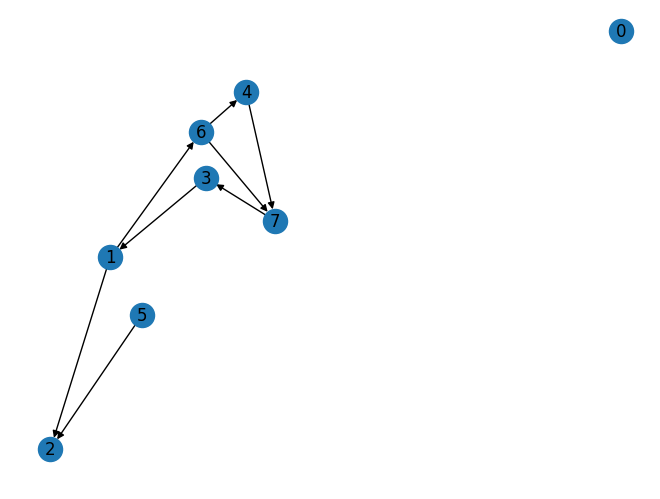

In [8]:
import networkx as nx
from matplotlib import pyplot as plt
my_graph=nx.DiGraph(digraph)
nx.draw(my_graph,with_labels=True)
plt.show()

#### I-Два коня

На стандартной шахматной доске (8х8) живут 2 шахматных коня: Красный и Зеленый. Обычно они беззаботно скачут по просторам доски, пощипывая шахматную травку, но сегодня особенный день: у Зеленого коня День Рождения. Зеленый конь решил отпраздновать это событие вместе с Красным. Но для осуществления этого прекрасного плана им нужно оказаться на одной клетке. Заметим, что Красный и Зеленый шахматные кони сильно отличаются от черного с белым: они ходят не по очереди, а одновременно,и если оказываются на одной клетке, никто никого не съедает. Сколько ходов им потребуется, чтобы насладиться праздником?

Формат входных данных
На вход программы поступают координаты коней, записанные по стандартным шахматным правилам (т.е. двумя символами - маленькая латинская буква (от a до h) и цифра (от 1 до 8), задающие столбец и строку соответственно).

Формат выходных данных
Требуется вывести наименьшее необходимое количество ходов, либо число -1, если кони не могут встретиться.

In [9]:
from collections import deque

def get_graph_from_chessboad_2knights():
    """Gets graph as dict of adjacency lists from chessboard,
    vertexes- cells ,
    neighbour vertexes- neighbour cells for knight move
    Returns graph"""
    letters='abcdefgh'
    numbers='12345678'
    moves=[(-2,-1),(-1,-2),(-1,2),(-2,1)]
    graph={}
    for i,l in enumerate(letters):
        for j,n in enumerate(numbers):
            for parity in ('e','o'):
                graph[l+n+parity]=set()
            add_neighbours(graph,moves,i,j,letters,numbers)
    return graph

def add_neighbours(graph,moves,i,j,letters,numbers):
    curr_cell=letters[i]+numbers[j]
    for k,l in moves:
        x=i+k;y=j+l;
        if 0<=x<8 and 0<=y<8:
            nb_cell=letters[x]+numbers[y];
            for parity,nb_parity in ('e','o'),('o','e'):
                graph[nb_cell+nb_parity].add(curr_cell+parity)
                graph[curr_cell+parity].add(nb_cell+nb_parity)

def bfs_distance(graph,start,end):
    """Get minimun path between vertexes start and end in graph
    Return distance or None if weres no path"""
    if start not in graph or end not in graph: return
    distance={start:0}
    if start==end: return 0
    queue=deque([start])
    while queue:
        v=queue.popleft()
        for u in graph[v]:
            if u not in distance:
                distance[u]=distance[v]+1
                if u==end: return distance[u]
                queue.append(u)
                
start,end=input().split()
graph=get_graph_from_chessboad_2knights()
knights_moves=bfs_distance(graph,start+'o',end+'o')
print(knights_moves//2 if not knights_moves is None and knights_moves%2==0 else -1)

a1 h8
3
